# Primer parcial de Taller de lenguaje de programación III: Python para Ciencia de Datos 



## 1. Algoritmia

- **Consigna**:
Estás trabajando en un programa que procesa listas, pero te enfrentas al desafío de
eliminar los elementos duplicados de una lista, manteniendo el orden original.

**Especificaciones de la Función**:
Nombre de la función:
- El nombre de la función debe ser: eliminar_duplicados
*Parámetros*:
    - lista (list): Una lista que puede contener elementos duplicados.

*Retorno*:
- list: Una nueva lista que contiene los elementos de la lista original sin
duplicados, conservando el orden original.

**Ejemplo**
- La función eliminar_duplicados toma la lista [1, 2, 3, 4, 4, 5, 6, 6, 7] como
entrada y devuelve una nueva lista [1, 2, 3, 4, 5, 6, 7] sin elementos duplicados,
manteniendo el orden original.

In [10]:
def eliminar_duplicados(lista: list) -> list:
    """
        Retorna una nueva lista con los elementos de `lista`, eliminando sus duplicados
        y manteniendo el orden original.

        :param lista La lista cuyos duplicados obviar
        :type list

        :returns Una nueva lista sin duplicados
        :rtype list
    """
    # Creamos una lista nueva que retornaremos 
    sin_duplicados = []
    # Creamos un conjunto para conocer qué elementos ya encontramos
    encontrados = set()

    # Por cada elemento en la lista...
    for elem in lista:
        # ..si ya no lo hemos encontrado...
        if elem not in encontrados:
            # ...lo agregamos a la nueva lista
            sin_duplicados.append(elem)
            # ... y al conjunto
            encontrados.add(elem)

    # Puesto que recorrimos la lista en orden, `sin_duplicados` 
    # también conserva el mismo orden.
    return sin_duplicados

assert eliminar_duplicados([1, 2, 3, 4, 4, 5, 6, 6, 7]) == [
    1, 2, 3, 4, 5, 6, 7], "El retorno de `eliminar_duplicados` no fue el esperado"

## 2. Análisis estadístico

Funciones de utilidad

In [11]:
# Formateo de caracteres
def separate(char="==", count = 20):
    print(char * count)

In [12]:
GRADES = [
    {"nombre": "Juan", "matematicas": 85, "ciencias": 90,
     "historia": 75},
    {"nombre": "María", "matematicas": 70, "ciencias": 80,
     "historia": 85},
    {"nombre": "Pedro", "matematicas": 95, "ciencias": 75,
     "historia": 90},
    {"nombre": "Ana", "matematicas": 80, "ciencias": 85, "historia":
     80},
    {"nombre": "Luis", "matematicas": 75, "ciencias": 70,
     "historia": 95},
    {"nombre": "Sofía", "matematicas": 90, "ciencias": 85,
     "historia": 75},
    {"nombre": "Carlos", "matematicas": 85, "ciencias": 90,
     "historia": 80},
    {"nombre": "Elena", "matematicas": 70, "ciencias": 75,
     "historia": 85},
    {"nombre": "Javier", "matematicas": 80, "ciencias": 85,
     "historia": 90},
    {"nombre": "Laura", "matematicas": 75, "ciencias": 70,
     "historia": 95},
    {"nombre": "Diego", "matematicas": 90, "ciencias": 85,
     "historia": 75},
    {"nombre": "Paula", "matematicas": 85, "ciencias": 90,
     "historia": 80},
    {"nombre": "Carmen", "matematicas": 70, "ciencias": 75,
     "historia": 85}
]

SUBJECTS = ["matematicas", "ciencias", "historia"]



1. Cálculo de promedio de calificaciones

- **Consigna**: Calcular el promedio de calificaciones para cada asignatura y mostrarlo.

In [13]:
import pandas as pd

def average_of(data_frame: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    """
        Toma un DataFrame cuyos elementos son números y, por cada columna,
        calcula el promedio.

        :param data_frame El DataFrame del cual calcular el promedio
        :type pd.DataFrame

        :param columns Las columnas de las que calcular el promedio
        :type list[str]

        :returns Un nuevo DataFrame donde las columnas originales son
                 las filas, y hay una única columna "average",
                 con el promedio de cada una.
        :rtype pd.DataFrame
    """
    # Creamos el DataFrame de promedios
    avg_data_frame = pd.DataFrame()

    # Por medio de mean() calculamos el promedio.
    # La sintaxis data_frame[columns] permite sólo considerar
    # las columnas que estén en el arreglo columns, evitando datos no numéricos.
    # Véase: https://pandas.pydata.org/docs/user_guide/indexing.html#selection-by-label
    avg_data_frame["average"] = data_frame[columns].mean()

    return avg_data_frame

Usado en main como:
```py
average = average_of(grades_frame, columns=SUBJECTS)
```

2. Calificaciones más altas por asignatura

- **Consigna**: Encuentra a los estudiantes que tienen las calificaciones más altas en cada
asignatura y mostralos junto con sus respectivas calificaciones.

In [14]:
def top_students_for(grades: pd.DataFrame, *, subject: str) -> pd.DataFrame:
    """
        Retorna un DataFrame con el mejor estudiante en `grades` para 
        la materia `subject`. 

        :param grades
        :type pd.DataFrame

        :param subject
        :type str
    """
    # Obtenemos la nota máxima para subject
    top_student_grade = grades[subject].max()

    # Filtramos las notas para sólo incluir los estudiantes
    # con la nota máxima para esa materia.
    top_students = grades[grades[subject] == top_student_grade]

    # Incluimos sólo las columnas "nombre" y la materia.
    top_students = top_students[["nombre", subject]]

    return top_students

Usado en main como:
```py
# Mostramos los mejores alumnos en cada asignatura
    for subject in SUBJECTS:
        print(f"Mejores alumnos para {subject}")
        print(top_students_for(grades_frame, subject=subject))
        separate()
```

3. Calcular porcentaje de aprobación

- **Consignas**: Calcular el porcentaje de estudiantes que aprobaron cada asignatura (con una calificación igual o superior a 60) y mostrar los resultados.

In [15]:
def calculate_passed_percentage(grades: pd.DataFrame, *, subjects: list[str]) -> pd.DataFrame:
    """
        Calcula qué porcentaje de las notas en `grades` son mayores o iguales a 60
        para cada una de las materias en `subjects`

        :param grades Las calificaciones
        :type pd.DataFrame

        :param subjects Las materias correspondientes
        :type list[str]

        :returns Un DataFrame donde las materias están en una columna
                 y el porcentaje en otra.
        :rtype pd.DataFrame
    """
    # Creamos un nuevo DataFrame para utilizar
    passed_data_frame = pd.DataFrame()

    # En `materias` ponemos los nombres de las columnas de `grades`
    passed_data_frame["materias"] = grades[subjects].columns

    # Filtramos las notas que son mayores o iguales a 60
    # y las contamos
    passed_data_frame["aprobacion"] = grades[subjects][grades[subjects] >= 60].index.size

    # El total de alumnos
    total_students = grades.index.size

    # Convertimos la aprobación a porcentaje
    passed_data_frame["aprobacion"] = passed_data_frame["aprobacion"] * 100 / total_students

    return passed_data_frame

Usado en `main` como:
```py
passed = calculate_passed_percentage(grades_frame, subjects=SUBJECTS)
```

4. Promedio por alumno

- Crear un DataFrame que incluya dos columnas una para el nombre del estudiante y la otra para el promedio de las notas de las asignaturas.

In [16]:
def get_student_avg_grade(grades: pd.DataFrame, *, subjects: list[str]) -> pd.DataFrame:
    """
        Toma una planilla de calificaciones y retorna un DataFrame con dos columnas.
        
        :param grades Las calificaciones de cada estudiante
        :type pd.DataFrame

        :returns Un DataFrame cuyas columnas son: El nombre del estudiante,
                 y el promedio de su calificación en las materias
        :rtype pd.DataFrame
    """
    # Creamos un nuevo DataFrame
    student_avg = pd.DataFrame()

    # Obtenemos los nombres de alumnos
    student_avg["nombre"] = grades["nombre"]

    # Calculamos el promedio con .mean()
    # Pero esta vez usamos el eje de las columnas
    # Esto hará que por cada alumno calculemos el promedio de calificaciones
    student_avg["promedio"] = grades[subjects].mean(axis=1)

    return student_avg

Usado en `main` como:
```py
student_average = get_student_avg_grade(grades_frame, subjects=SUBJECTS)
```

**Código completo de `main`**:

In [17]:
import pandas as pd
def main():
    """
        Realiza un análisis estadístico de las calificaciones de los estudiantes.
    """
    if not isinstance(GRADES, list):
        raise ValueError("Las calificaciones deben estar dispuestas en una lista.")

    for grade in GRADES:
        if not isinstance(grade, dict):
            raise ValueError("Las calificaciones deben ser diccionarios")
        elif "nombre" not in grade:
            raise ValueError("Las calificaciones deben contar con el nombre del alumno")

    # Creamos un DataFrame para trabajar con los datos más cómodamente
    grades_frame = pd.DataFrame(GRADES)

    # Calculamos y mostramos el promedio de cada asignatura
    average = average_of(grades_frame, columns=SUBJECTS)

    separate()
    print(f"El promedio por materia es el siguiente: ")
    print(average)
    separate()

    # Mostramos los mejores alumnos en cada asignatura
    for subject in SUBJECTS:
        print(f"Mejores alumnos para {subject}")
        print(top_students_for(grades_frame, subject=subject))
        separate()

    passed = calculate_passed_percentage(grades_frame, subjects=SUBJECTS)
    print(f"El porcentaje de aprobación es el siguiente: ")
    print(passed)
    separate()

    student_average = get_student_avg_grade(grades_frame, subjects=SUBJECTS)

    print("Promedios de cada estudiante: ")
    print(student_average)

    return student_average


if __name__ == "__main__":
    main()

El promedio por materia es el siguiente: 
               average
matematicas  80.769231
ciencias     81.153846
historia     83.846154
Mejores alumnos para matematicas
  nombre  matematicas
2  Pedro           95
Mejores alumnos para ciencias
    nombre  ciencias
0     Juan        90
6   Carlos        90
11   Paula        90
Mejores alumnos para historia
  nombre  historia
4   Luis        95
9  Laura        95
El porcentaje de aprobación es el siguiente: 
      materias  aprobacion
0  matematicas       100.0
1     ciencias       100.0
2     historia       100.0
Promedios de cada estudiante: 
    nombre   promedio
0     Juan  83.333333
1    María  78.333333
2    Pedro  86.666667
3      Ana  81.666667
4     Luis  80.000000
5    Sofía  83.333333
6   Carlos  85.000000
7    Elena  76.666667
8   Javier  85.000000
9    Laura  80.000000
10   Diego  83.333333
11   Paula  85.000000
12  Carmen  76.666667


## 3. Gráfico con `matplotlib`

- **Consigna**: Basándote en el DataFrame creado. Utiliza un gráfico de barras donde el eje x represente los nombres de los estudiantes y el eje y represente el promedio de las calificaciones.

    nombre   promedio
0     Juan  83.333333
1    María  78.333333
2    Pedro  86.666667
3      Ana  81.666667
4     Luis  80.000000
5    Sofía  83.333333
6   Carlos  85.000000
7    Elena  76.666667
8   Javier  85.000000
9    Laura  80.000000
10   Diego  83.333333
11   Paula  85.000000
12  Carmen  76.666667


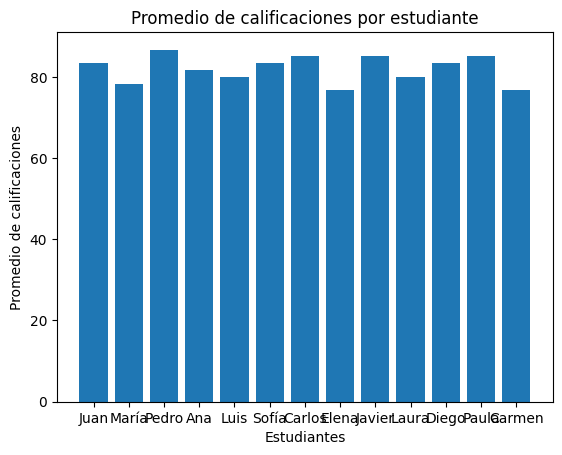

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Construimos el DataFrame de las calificaciones
grade_frame = pd.DataFrame(GRADES)
# Obtenemos el promedio por estudiante con una función 
# ya implementada
student_avg = get_student_avg_grade(grade_frame, subjects=SUBJECTS)

# Mostramos los promedios por consola
print(student_avg)

# Creamos un gráfico de barra para el nombre y el promedio
plt.bar(student_avg["nombre"], student_avg["promedio"])

# Colocamos un título y etiquetas de ejes
plt.title("Promedio de calificaciones por estudiante")
plt.xlabel("Estudiantes")
plt.ylabel("Promedio de calificaciones")

# Mostramos el gráfico
plt.show()